<a href="https://colab.research.google.com/github/DCC773/brecha-del-producto-e-inflaci-n-en-el-Peru/blob/main/Output_Gap_e_Inflacion_Evidencia_para_el_Peru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

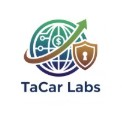

# Brecha del producto e inflación en el Perú

**Autor:** Carruitero castillo, david

**Línea:** Econometría Aplicada  

## Resumen
Este trabajo analiza empíricamente la relación entre la brecha del producto y la inflación en la economía peruana, una relación central en la teoría macroeconómica moderna y en los marcos de política monetaria. Dado que el producto potencial no es directamente observable, este se estima mediante el **filtro Hodrick–Prescott** aplicado al Producto Bruto Interno (PBI), este filtro Hodrick–Prescott descompone el Producto Interno Bruto (PIB) en un componente tendencial (crecimiento a largo plazo o PBI potencial) y un componente cíclico (fluctuaciones a corto plazo o brecha del producto. A partir de esta estimación se construye **la brecha del producto, la cual se incorpora como variable explicativa en un modelo econométrico de inflación junto con la inflación rezagada**, capturando la persistencia inflacionaria. Los resultados muestran que una brecha del producto positiva(la economia pera por encima del potencial) se asocia con mayores presiones inflacionarias, en línea con la teoría macroeconómica estándar y la evidencia utilizada por bancos centrales.

## Introducción

La teoría macroeconómica establece que cuando una economía opera por encima de su nivel de producto potencial, se generan presiones inflacionarias como resultado de excesos de demanda agregada.

En este contexto, el presente trabajo tiene como objetivo evaluar empíricamente dicha relación para el caso del Perú, utilizando datos macroeconómicos(PBI e IPC) del BCRP y herramientas econométricas estándar(Regresion multiple y filtro Hodrick–Prescott) .


## Marco teórico

El producto potencial se define como el nivel de producción consistente con una inflación estable. La diferencia entre el producto observado y el producto potencial se conoce como brecha del producto y refleja el grado de sobrecalentamiento o holgura de la economía.

En ese sentido, para evaluar la relación entre la brecha del producto y la inflación, se estima un modelo de regresión múltiple dinámica(curva de
Phillips Neokeynesiana (CPNK)):


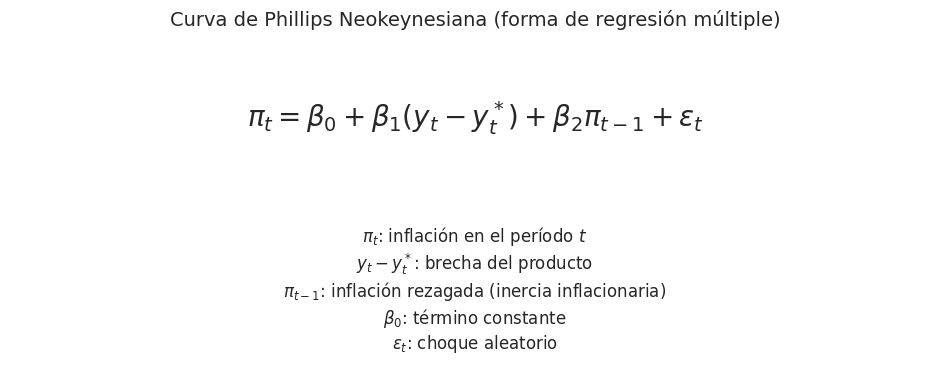

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Ecuación principal
plt.text(
    0.5, 0.70,
    r"$\pi_t = \beta_0 + \beta_1 (y_t - y_t^*) + \beta_2 \pi_{t-1} + \varepsilon_t$",
    fontsize=20,
    ha='center'
)

# Leyenda / explicación de variables
plt.text(
    0.5, 0.38,
    r"$\pi_t$: inflación en el período $t$" "\n"
    r"$y_t - y_t^*$: brecha del producto" "\n"
    r"$\pi_{t-1}$: inflación rezagada (inercia inflacionaria)" "\n"
    r"$\beta_0$: término constante" "\n"
    r"$\varepsilon_t$: choque aleatorio",
    fontsize=12,
    ha='center',
    va='top'
)

plt.axis('off')
plt.title("Curva de Phillips Neokeynesiana (forma de regresión múltiple)", fontsize=14)
plt.show()


## Metodología

Se utilizan series macroeconómicas trimestrales del Perú.
El producto potencial se estima mediante el filtro Hodrick–Prescott aplicado al PBI real.
La inflación se mide a partir del IPC(indice del precio del consumidor). Ambos indicadores macroecnomicos, se obtienen del BCRP(banco central de reserva del Peru).

#Datos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import statsmodels.api as sm


Cargamos los archivos donde se contienen los indicadores: inflacion

In [ ]:
# cargar, el IPC mensual
ipc = pd.read_excel("IPC MENSUAL.xlsx", parse_dates=["Fecha"])



Se carga la serie mensual del Índice de Precios al Consumidor (IPC) desde un archivo Excel y se convierte la variable temporal en un objeto de tipo fecha (datetime)

In [ ]:

# Convertir la columna 'Fecha' al formato datetime (año-mes), asi trabajamos una serie de tiempo
ipc["Fecha"] = pd.to_datetime(ipc["Fecha"], format="%Y-%m")

# Establecer la fecha como índice del DataFrame
ipc.set_index("Fecha", inplace=True)

# Verificar el rango temporal de la serie
ipc.index.min(), ipc.index.max()


(Timestamp('1999-01-01 00:00:00'), Timestamp('2024-12-01 00:00:00'))

se transforma el IPC mensual en un IPC trimestral promedio, calculando el promedio de los tres meses que componen cada trimestre

In [ ]:

# Convertir el IPC mensual a frecuencia trimestral
ipc_trimestral = ipc.resample("Q").mean()

# "resample" se usa para cambiar las frecuencias de una serie de tiempo

/tmp/ipython-input-1798039718.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ipc_trimestral = ipc.resample("Q").mean()



La inflación se calcula como la variación interanual del IPC trimestral, es decir, el cambio porcentual del índice del trimestre actual respecto al mismo trimestre del año anterior. Esto permite alinear la frecuencia de la inflación con la del PBI trimestral y analizar la relación entre brecha del producto e inflación.

In [ ]:
ipc_trimestral["inflacion"] = 100 * (
    np.log(ipc_trimestral["IPC"]) -
    np.log(ipc_trimestral["IPC"].shift(4))
)

ipc_trimestral = ipc_trimestral.dropna()

pd.set_option('display.max_rows', None)
ipc_trimestral



,IPC,inflacion
Fecha,,
2000-03-31,54.953333,3.808100
2000-06-30,55.536667,3.381670
2000-09-30,56.130000,3.640504
2000-12-31,56.610000,3.927018
2001-03-31,56.976667,3.615749
2001-06-30,56.976667,2.559836
2001-09-30,56.953333,1.456179
2001-12-31,56.736667,0.223503
2002-03-31,56.396667,-1.023177


Graficamos la serie de la inflacion

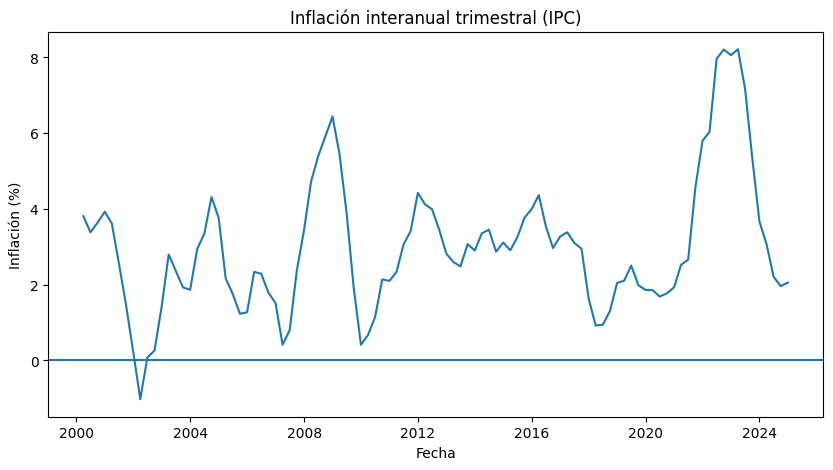

In [ ]:

#serie de tiempo de la inflacion interanual trimestral

plt.figure(figsize=(10,5))
plt.plot(ipc_trimestral.index, ipc_trimestral["inflacion"])
plt.axhline(0)  # línea de referencia
plt.title("Inflación interanual trimestral (IPC)")
plt.xlabel("Fecha")
plt.ylabel("Inflación (%)")
plt.show()


Cargamos los archivos donde se contienen los indicadores: PBI

In [ ]:

#  archivo
pbi = pd.read_excel("PBI.xlsx")

#  Convertir Fecha correctamente (YYYYTQ)
pbi["Fecha"] = pbi["Fecha"].astype(str)

periodos = pd.PeriodIndex(
    pbi["Fecha"].str.replace("T", "Q"),
    freq="Q"
)


pbi.index = periodos.to_timestamp(how="end")
pbi.index = pbi.index.normalize()



#  Eliminar columna Fecha
pbi.drop(columns="Fecha", inplace=True)

#  Verificación
print(pbi.index.min(), pbi.index.max())
print(pbi.tail())



2000-03-31 00:00:00 2024-12-31 00:00:00
               PBI
Fecha             
2023-12-31  148898
2024-03-31  135394
2024-06-30  145965
2024-09-30  148689
2024-12-31  155552


 Se usa log(PBI) para que el ciclo (output gap) represente desviaciones porcentuales
 respecto al PBI potencial y la serie sea más estable y comparable con la inflación.

In [ ]:
#  Logaritmo del PBI
pbi["log_pbi"] = np.log(pbi["PBI"])


In [ ]:
pbi.index.min(), pbi.index.max()


(Timestamp('2000-03-31 00:00:00'), Timestamp('2024-12-31 00:00:00'))

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pbi


,PBI,log_pbi
Fecha,,
2000-03-31,54675,10.909162
2000-06-30,58256,10.972602
2000-09-30,54622,10.908192
2000-12-31,54655,10.908796
2001-03-31,51760,10.854373
2001-06-30,58431,10.975602
2001-09-30,56120,10.935248
2001-12-31,57268,10.955497
2002-03-31,55138,10.917594


Graficamos la serie del PBI

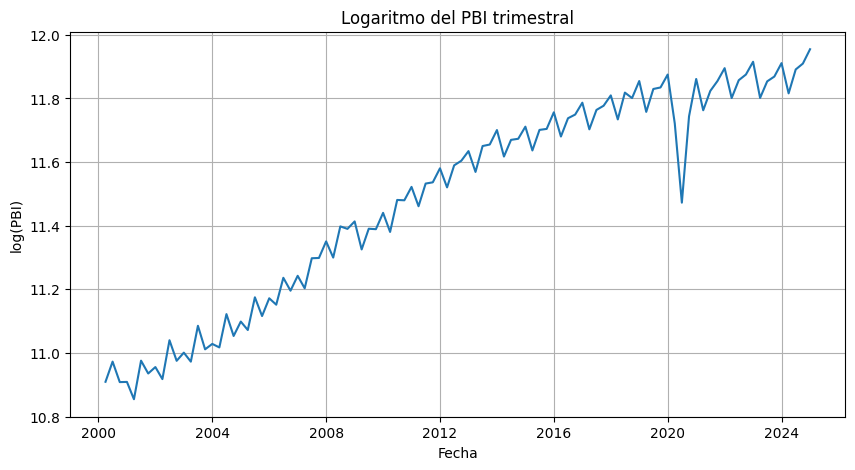

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(pbi.index, pbi["log_pbi"])
plt.title("Logaritmo del PBI trimestral")
plt.xlabel("Fecha")
plt.ylabel("log(PBI)")
plt.grid(True)
plt.show()


#filtro de hodrick-prescott

 Filtrar HP para separar PBI en tendencia (potencial) y ciclo (output gap). Este ultimo servira para nuestro modelo econometrico simple


* PBI tendencial (o potencial): muestra el nivel “normal”
de la economía, es decir, cómo crecería sin los altibajos temporales. Piensa en una línea suave que refleja la capacidad estable de la economía.

* PBI cíclico (o output gap): muestra las desviaciones respecto a esa tendencia. Si está por encima de la línea tendencial, la economía está “caliente” (expansión); si está por debajo, está “fría” (recesión o desaceleración).

En otras palabras, el ciclo indica los movimientos a corto plazo, mientras que la tendencia muestra el crecimiento de largo plazo.

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Filtro HP
cycle, trend = hpfilter(pbi["log_pbi"], lamb=1600)

#  resultados guardados
pbi["pbi_trend"] = trend
pbi["pbi_cycle"] = cycle


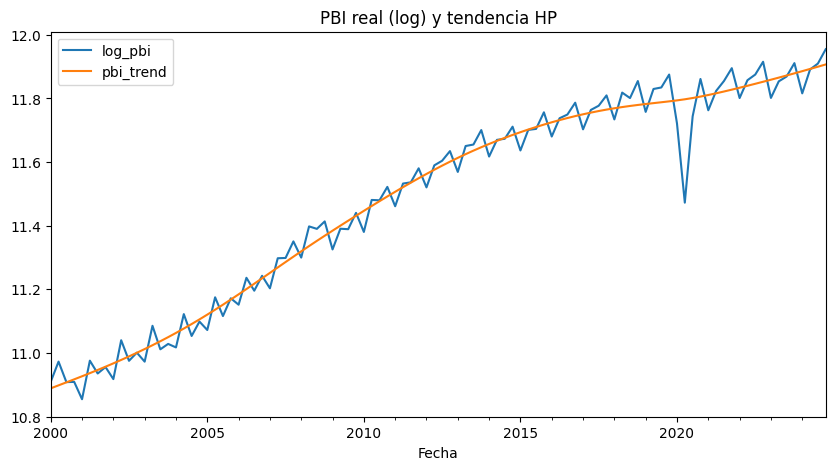

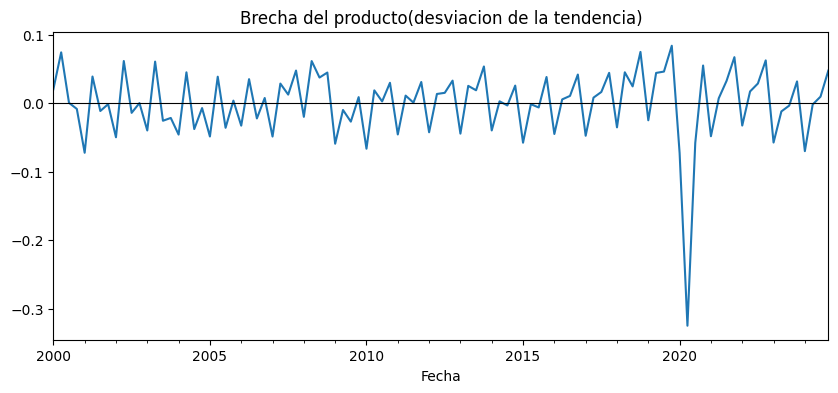

In [ ]:
import matplotlib.pyplot as plt

pbi[["log_pbi", "pbi_trend"]].plot(figsize=(10,5))
plt.title("PBI real (log) y tendencia HP")
plt.show()

pbi["pbi_cycle"].plot(figsize=(10,4))
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Brecha del producto(desviacion de la tendencia)")
plt.show()


# Hipotesis

Se plantea la hipótesis de que la brecha del producto (output gap) tiene un efecto positivo sobre la inflación: a mayor expansión económica por encima de la tendencia, mayor será la inflación. Esta relación se tratará de verificar mediante la estimación del modelo econométrico.

# Planteamiento del modelo econometrico

Primero se procede a unir todos los datos que necesitaremos para nuestro modelo de regresion multiple: ciclo del PBI, inflacion y inflacion rezagada

In [ ]:
df = pbi[["pbi_cycle"]].join(
    ipc_trimestral[["inflacion"]],
    how="inner"
)
df["inflacion_lag"] = df["inflacion"].shift(1)
df = df.dropna()
df.head()



,pbi_cycle,inflacion,inflacion_lag
Fecha,,,
2000-06-30,0.074610,3.381670,3.808100
2000-09-30,0.000775,3.640504,3.381670
2000-12-31,-0.008118,3.927018,3.640504
2001-03-31,-0.072170,3.615749,3.927018
2001-06-30,0.039243,2.559836,3.615749


## Estimacion del modelo econometrico

In [ ]:
import statsmodels.api as sm

X = df[["pbi_cycle", "inflacion_lag"]]
X = sm.add_constant(X)

y = df["inflacion"]

modelo = sm.OLS(y, X).fit()

modelo.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflacion   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           7.48e-36
Time:                        02:57:31   Log-Likelihood:                -114.35
No. Observations:                  99   AIC:                             234.7
Df Residuals:                      96   BIC:                             242.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2914      0.154      1.896      0.061      -0.014       0.596
pbi_cycle         2.2582      1.547      1.460      0.148      -0.812       5.329
inflacion_lag     0.8972      0.044     20.380      0.000       0.810       0.985
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.049
Skew:                           0.008   Prob(JB):                        0.976
Kurtosis:                       3.107   Cond. No.                         71.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dado que los residuos presentan autocorrelación(DW=0.996), se estimó el modelo utilizando errores estándar robustos de Newey–West, adecuados para datos trimestrales, garantizando inferencia estadística válida.

In [ ]:
modelo_nw = sm.OLS(y, X).fit(
    cov_type='HAC',
    cov_kwds={'maxlags': 4}
)
modelo_nw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflacion   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           1.87e-27
Time:                        02:37:38   Log-Likelihood:                -114.35
No. Observations:                  99   AIC:                             234.7
Df Residuals:                      96   BIC:                             242.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2914      0.155      1.882      0.060      -0.012       0.595
pbi_cycle         2.2582      1.325      1.704      0.088      -0.339       4.856
inflacion_lag     0.8972      0.057     15.646      0.000       0.785       1.010
==============================================================================
Omnibus:                        0.302   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.049
Skew:                           0.008   Prob(JB):                        0.976
Kurtosis:                       3.107   Cond. No.                         71.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

Los resultados evidencian una elevada persistencia inflacionaria (coef. rezago = 0.897, \(p<0.01\)), la cual, lejos de indicar descontrol, refleja la consolidación de la estabilidad de precios en torno al objetivo del 2%. Esta dinámica es consistente con un anclaje sólido de las expectativas dentro del esquema de Metas de Inflación del BCRP. Asimismo, se halló un impacto positivo y significativo de la brecha del producto (coef. = 2.258, \(p=0.088\)), confirmando que la política monetaria mantiene capacidad de respuesta ante presiones de demanda en un contexto de predictibilidad macroeconómica.

In [ ]:
# Obtener los coeficientes redondeados
const = modelo_nw.params['const']
pbi = modelo_nw.params['pbi_cycle']
lag = modelo_nw.params['inflacion_lag']

# Mostrar la ecuación de la regresión
print("Ecuación de la regresión múltiple:")
print(f"inflacion = {const:.4f} + {pbi:.4f} × pbi_cycle + {lag:.4f} × inflacion_lag")
print()



Ecuación de la regresión múltiple:
inflacion = 0.2914 + 2.2582 × pbi_cycle + 0.8972 × inflacion_lag



## Rendimiento del modelo

Permite visualizar el rendimiento de un modelo de regresión. El eje x representa los valores reales y el eje y los valores predichos. Idealmente, si las predicciones son correctas, los puntos se ubicarán a lo largo de una línea recta con una pendiente de 1.

De lo que se oberva de los resultados podemos decir, que el modelo tiene un buen poder predictivo. Cuanto más pegados estén los puntos a la línea roja, mejor es el modelo

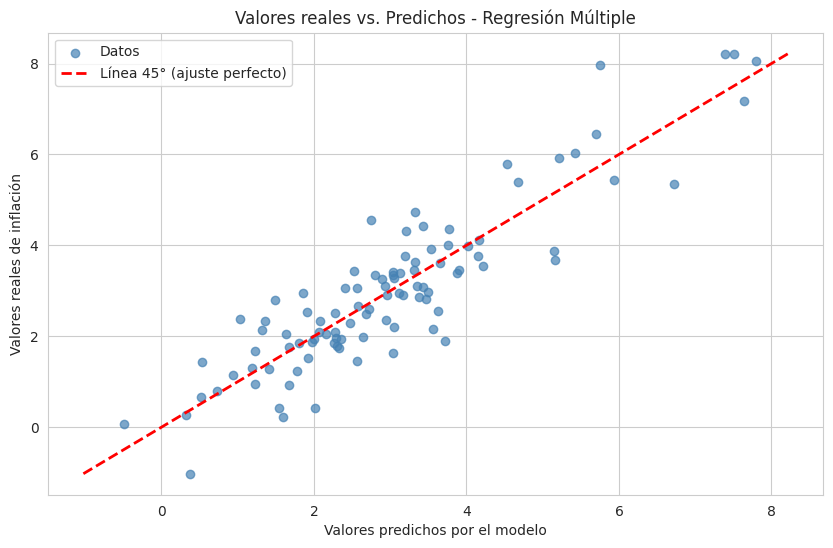

In [ ]:


# Gráfica: Valores reales vs. Predichos
predichos = modelo_nw.predict(X)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.scatter(predichos, y, alpha=0.7, color='steelblue', label='Datos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea 45° (ajuste perfecto)')
plt.xlabel('Valores predichos por el modelo')
plt.ylabel('Valores reales de inflación')
plt.title('Valores reales vs. Predichos - Regresión Múltiple')
plt.legend()
plt.show()

## Gráfico comparativo de inflación real vs. inflación estimada

Se visualiza cómo el modelo captura los movimientos de la inflación a lo largo del tiempo, permitiendo evaluar el ajuste del modelo.

Ademas, podemos decir que la gráfica muestra que el modelo de regresión múltiple, basado en el ciclo del PBI y la inflación rezagada, captura con gran precisión la evolución temporal de la inflación real entre 2000 y 2024.


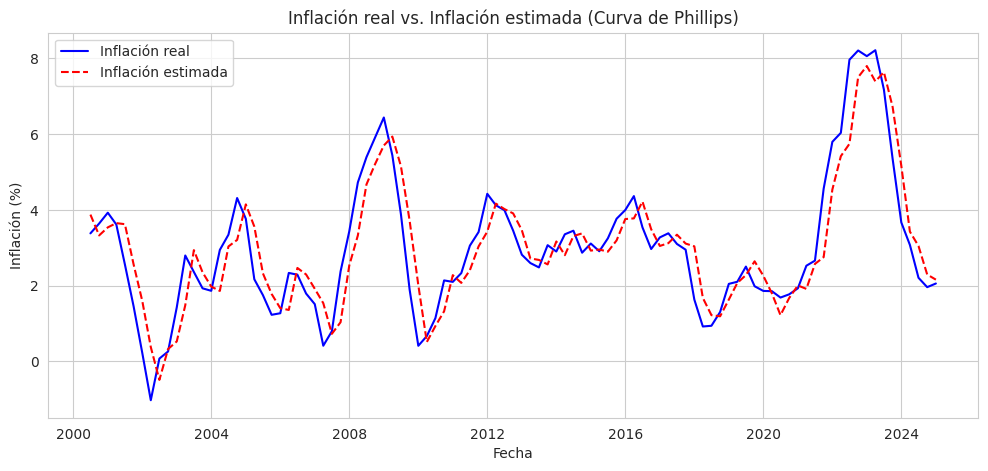

In [ ]:
import matplotlib.pyplot as plt

# Inflación predicha
df['inflacion_pred'] = modelo_nw.predict(X)

plt.figure(figsize=(12,5))
plt.plot(df.index, df['inflacion'], label="Inflación real", color="blue")
plt.plot(df.index, df['inflacion_pred'], label="Inflación estimada", color="red", linestyle='--')
plt.title("Inflación real vs. Inflación estimada (Curva de Phillips)")
plt.xlabel("Fecha")
plt.ylabel("Inflación (%)")
plt.legend()
plt.show()


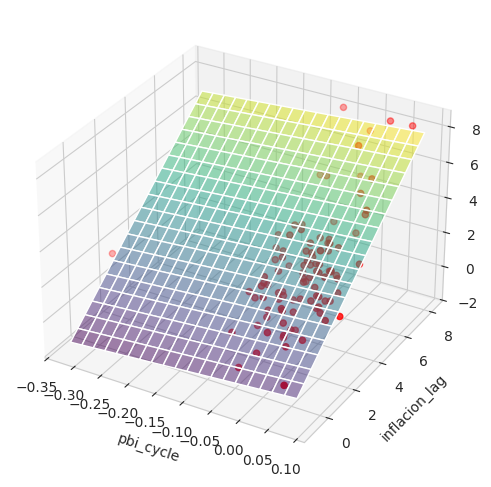

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X1, X2 = np.meshgrid(
    np.linspace(df['pbi_cycle'].min(), df['pbi_cycle'].max(), 20),
    np.linspace(df['inflacion_lag'].min(), df['inflacion_lag'].max(), 20)
)

Y = modelo.params['const'] + modelo.params['pbi_cycle']*X1 + modelo.params['inflacion_lag']*X2

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y, alpha=0.5, cmap='viridis')
ax.scatter(df['pbi_cycle'], df['inflacion_lag'], df['inflacion'], color='red')
ax.set_xlabel("pbi_cycle")
ax.set_ylabel("inflacion_lag")
ax.set_zlabel("Inflación real")
plt.show()

El gráfico en tres dimensiones muestra cómo la inflación depende al mismo tiempo del ciclo económico y de su comportamiento pasado. La superficie representa la inflación estimada por el modelo, mientras que los puntos corresponden a los datos observados. Se aprecia que la inflación tiende a ser mayor cuando la economía está en expansión y cuando la inflación previa es elevada.

# CONCLUSION:

El análisis confirma que la inflación en Perú está influenciada por su valor pasado y por la actividad económica. La brecha del producto positiva (expansión) tiende a asociarse con mayor inflación, mientras que la inflación rezagada muestra persistencia significativa. En conjunto, el modelo respalda parcialmente la Curva de Phillips y ofrece evidencia cuantitativa sobre la relación entre ciclo económico e inflación.